
<h1><center>Unsupervised Learning - Project </center></h1>
    <div style="text-align: center;">
    
</div>
<h1><center>Enhancing Market Penetration and Customer Service at AllLife Bank: A Data-Driven Approach</center></h1>


In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
!pip install --upgrade -q jinja2

## Importing necessary libraries

In [1]:
#Importing libraries for reading and manipulating data
import numpy as np
import pandas as pd

#Libraries for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#libraries to limit the number of displayed column
sns.set_theme(style='darkgrid')
#Removes the number of limits in displayed columns
pd.set_option('display.max_columns', None)
#Sets the number of limits of displayed rows
pd.set_option('display.max_rows', 200)

#Scaling the data using z-score
from sklearn.preprocessing import StandardScaler

#to compute distance
from scipy.spatial.distance import pdist, cdist

#To perform K-Means Clustering and Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#To visualize elbo curve
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#To perform Hierarchical clustering, compute cophenatic correlation and create dendograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

## to perform PCA
from sklearn.decomposition import PCA

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Reading the Dataset

In [3]:
# loading the dataset
data = pd.read_excel("C:/Users/hp/Downloads/Credit Card Customer Data.xlsx")

## Overview of the dataset

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not.
- Get information about the number of rows and columns in the dataset.
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data. data

### Checking the shape of the dataset

In [10]:
data.shape

(660, 7)

- There are 660 rows and 7 columns in the dataset

### Displaying few rows of the dataset

In [13]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [14]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


### Creating a Copy of original data

In [16]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking the data types of the columns for the dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


- There are total 660 entries of Range Index and total 7 Data columns
- All data types in the given dataset are Integer type
- Memory usage is 36.2KB

### We won't need Sl_No and Customer Key for analysis, so let's drop these columns

In [21]:
df.drop(["Sl_No", 'Customer Key'], axis=1, inplace=True)

### Checking for duplicate and missing values 

In [23]:
df.duplicated().sum()

11

In [24]:
df.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- There are no missing values in the dataset
- There are 11 duplicate entries in the dataset, lets drop the duplicate entries.

In [26]:
df = df[(~df.duplicated())].copy()

### Statistical summary of the dataset

**Let's check the statistical summary of the data.**

In [29]:
df.describe(include ='all').T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,649.0,34878.274268,37813.736638,3000.0,11000.0,18000.0,49000.0,200000.0
Total_Credit_Cards,649.0,4.708783,2.173763,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,649.0,2.397535,1.625148,0.0,1.0,2.0,4.0,5.0
Total_visits_online,649.0,2.624037,2.952888,0.0,1.0,2.0,4.0,15.0
Total_calls_made,649.0,3.590139,2.877911,0.0,1.0,3.0,5.0,10.0


- All columns have 649 observations.
- There is a wide variation in `Avg_Credit_Limit`(3000.0 to 200000.0), indicating diverse spending capacities among customers.
- In `Total_Credit_Cards` most customers hold between 1 and 10 credit cards, with an average of around 5 cards, suggesting moderate financial engagement.
- `Total_visits_bank` insightes while some customers do not visit the bank at all, others visit up to 5 times per year.
- Many customers prefer online services, although there are also customers who do not make any online visits.
- On average, `Total_calls_made` by the customers about 3 times a year, with some customers making up to 10 calls.

## Exploratory Data Analysis

In [32]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [33]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`Avg_Credit_Limit`**

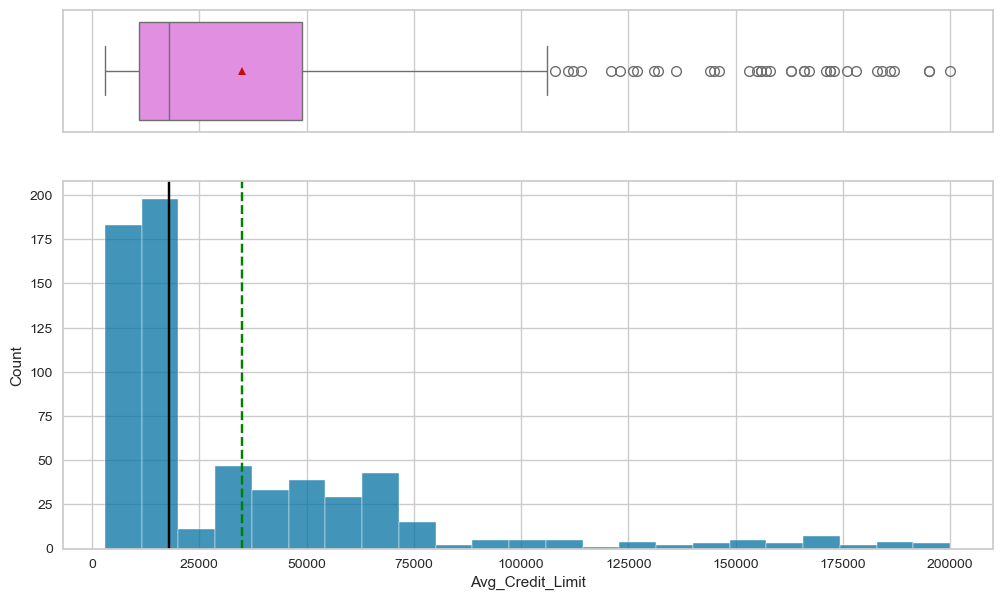

In [35]:
histogram_boxplot(df, 'Avg_Credit_Limit')

- Many outliers are present
- Mean average is between 25000 and 50000
- The wide variation can be observed, the distribution is righ skewed

**`Total_Credit_Cards`**

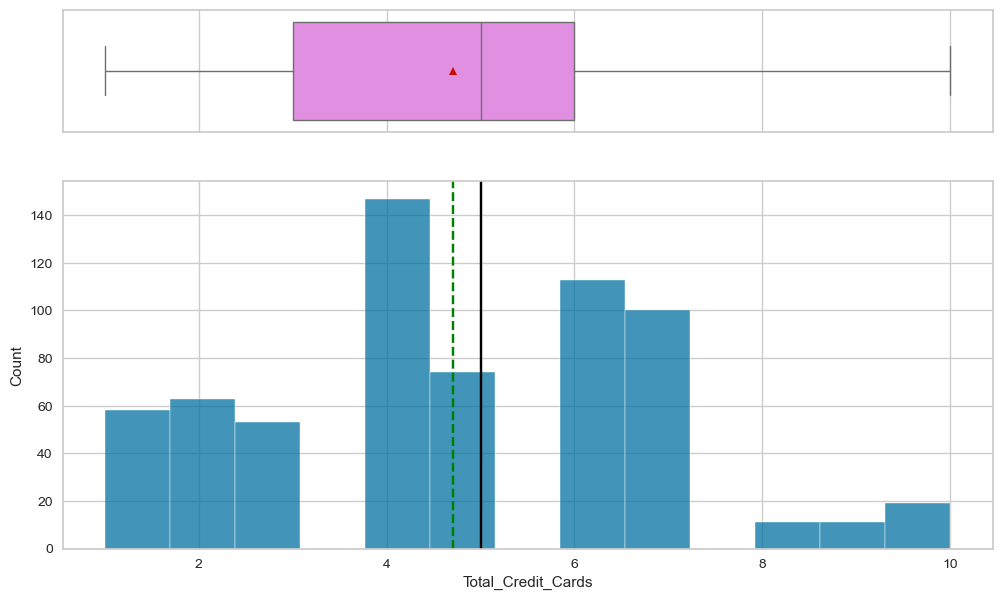

In [38]:
histogram_boxplot(df,'Total_Credit_Cards')

- IQR is 3 to 6, most of the customers have credit cards more than 3
- The distribution is not even

**`Total_visits_bank`**

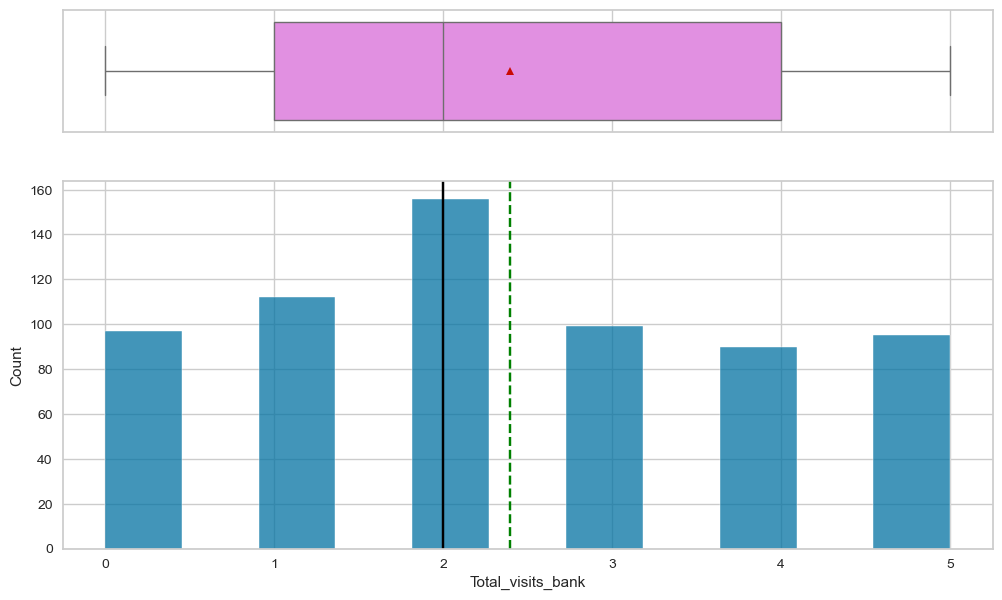

In [41]:
histogram_boxplot(df,'Total_visits_bank')

- The average customers visit the bank is limits to 2, there are customers not at all visit the bank.
- Slightly normal distributed, and no outliers are present

**`Total_visits_online`**

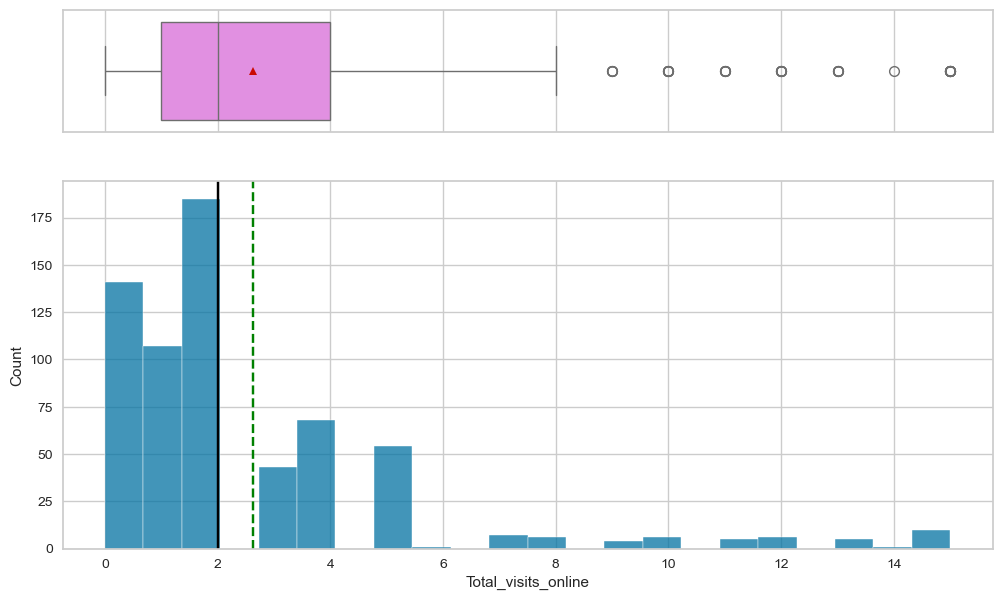

In [44]:
histogram_boxplot(df,'Total_visits_online')

- When compared to visiting bank directly many of them opt to use online visits
- Mean: 2.6 visits/year, but Std: 2.93 (high variance), outliers are present
- Median is 2, suggesting a skewed distribution (some high-frequency users).
- The max is 15, indicating some customers are highly engaged online.

**`Total_calls_made`**

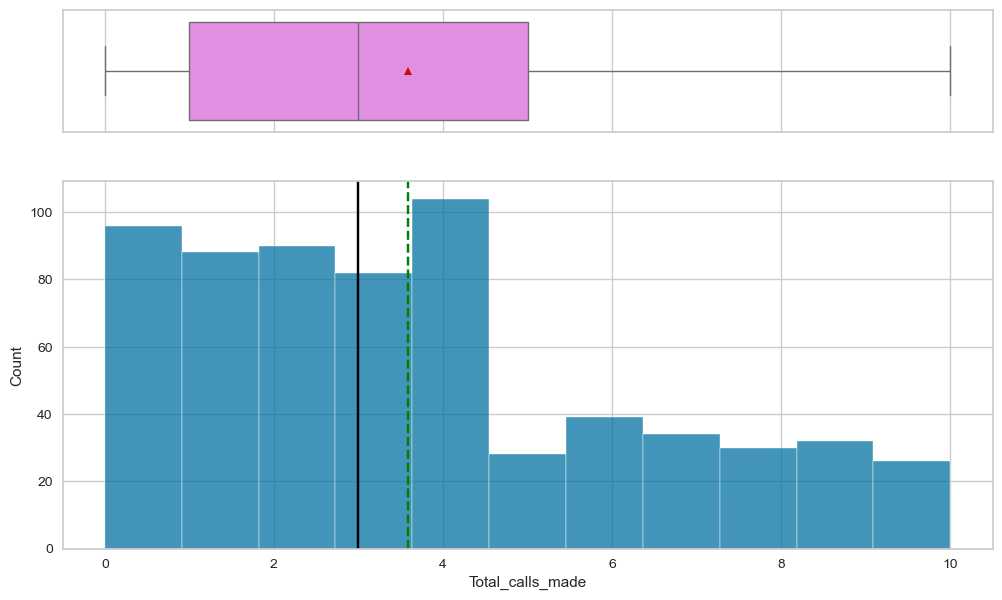

In [47]:
histogram_boxplot(df,'Total_calls_made')

- Mean: 3.58 calls/year, Std: 2.87
- Some customers make zero calls, while others call 10 times a year.
- This aligns with the bank’s concern about poor service perception.
- Rightly skewed with no outliers

In [49]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

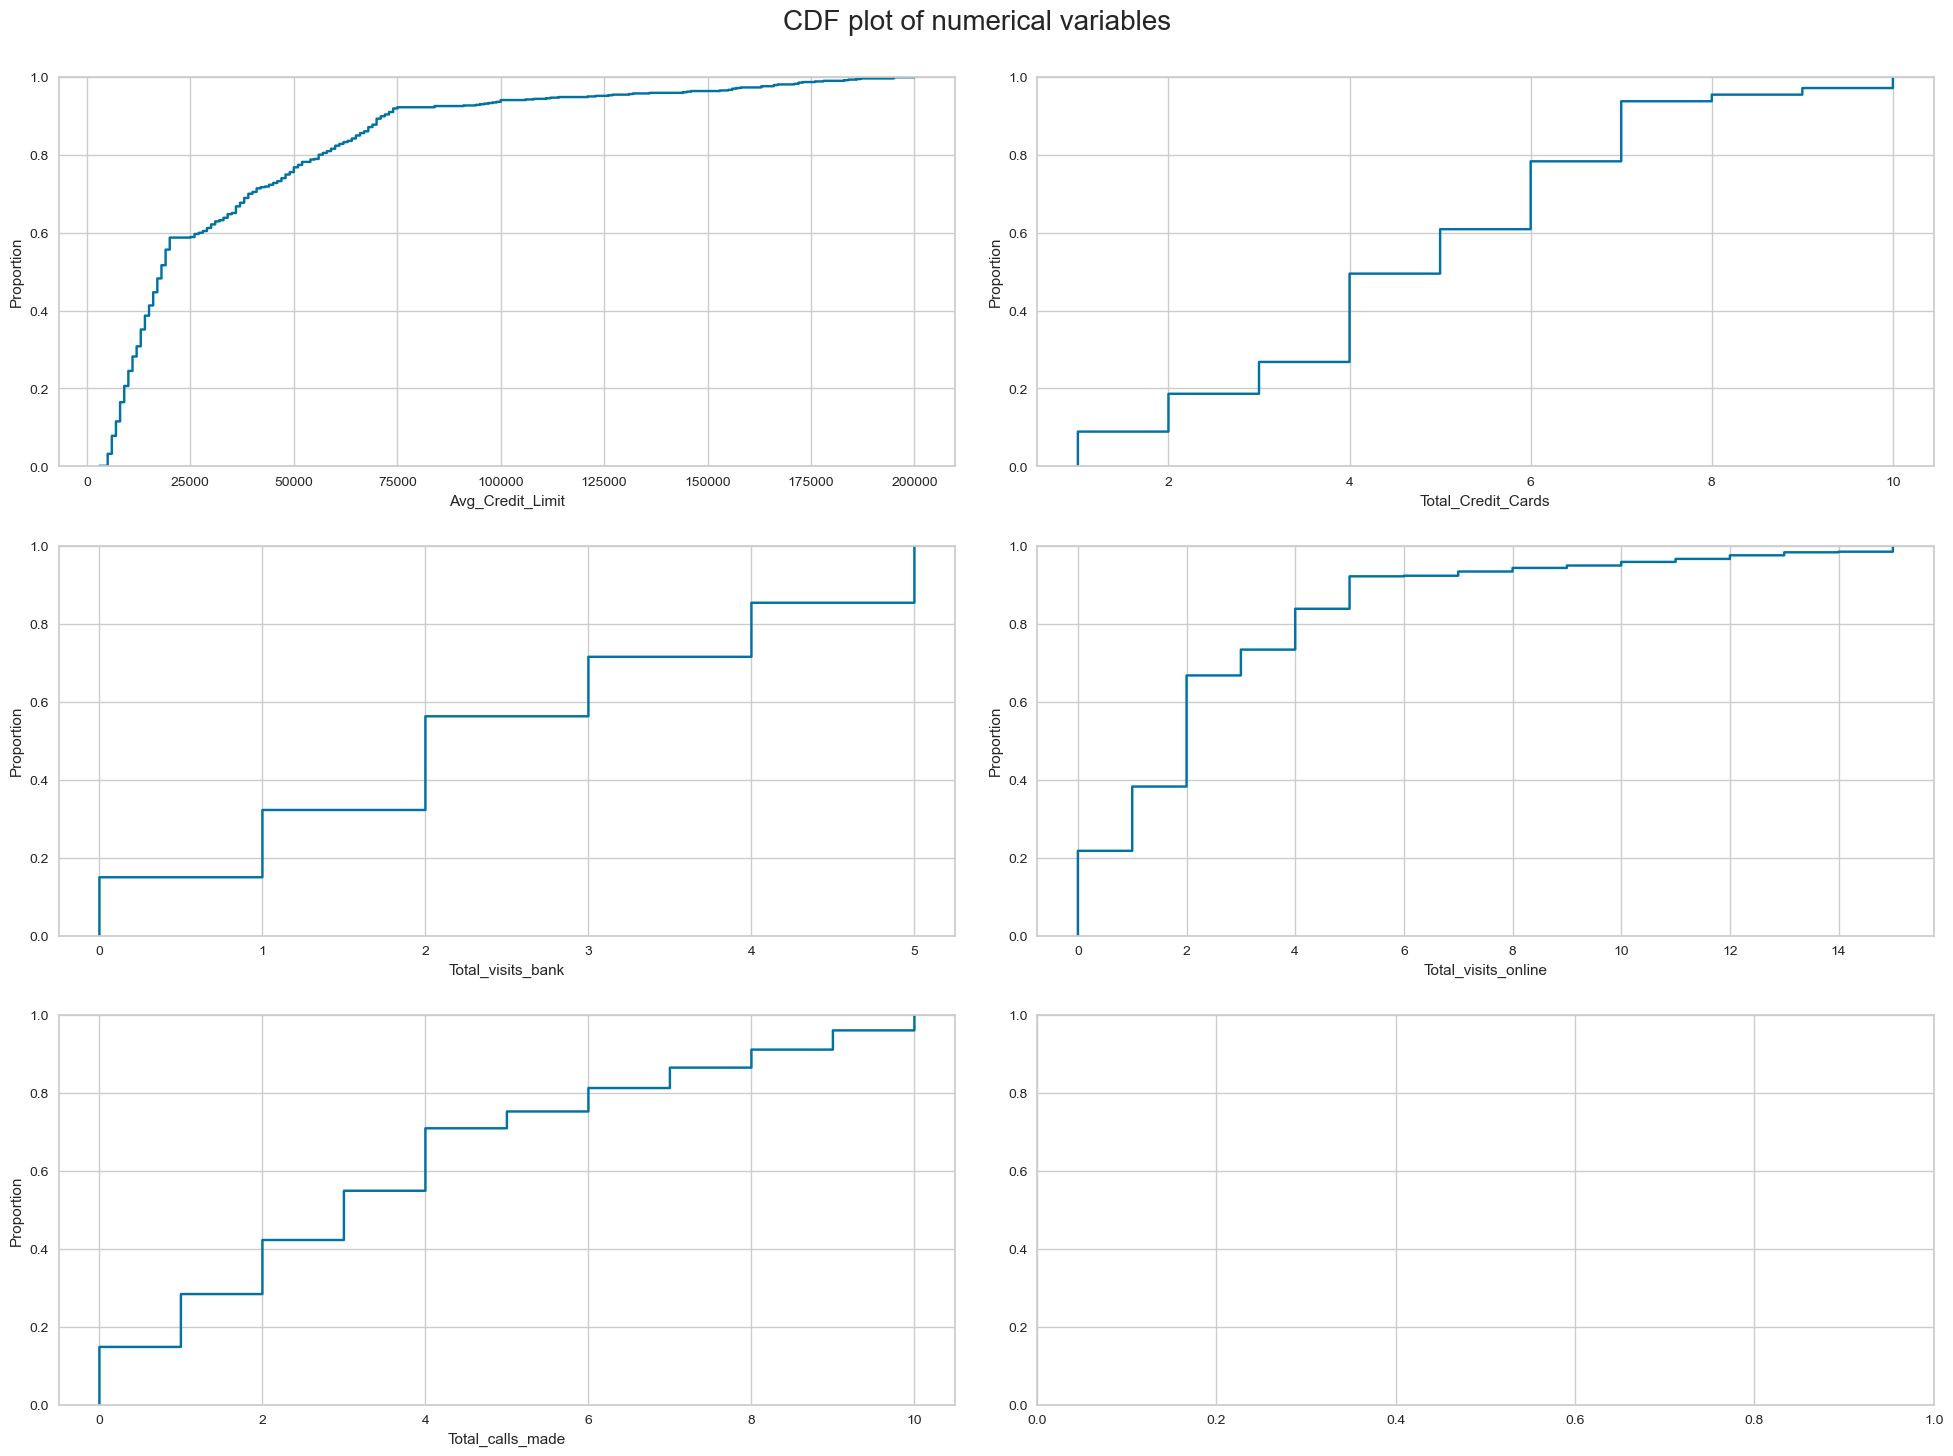

In [50]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**1. Avg_Credit_Limit (Top-left plot)**
- The curve rises sharply at lower credit limits, meaning a large portion of customers have a lower credit limit.
- The curve flattens as the credit limit increases, suggesting fewer customers with very high credit limits.
- Most customers have an average or low credit limit, with only a few having very high limits.

**2. Total_Credit_Cards (Top-right plot)**
- The CDF appears to have a stepwise increase, indicating discrete values.
- At 4-5 credit cards, the curve is steep, meaning most customers have around 4-5 credit cards.
- The majority of customers hold a moderate number of credit cards.

**3. Total_visits_bank (Middle-left plot)**
- The curve is stepwise, meaning customers visit the bank in discrete amounts (0, 1, 2, etc.).
- A steep increase at the lower end indicates that many customers visit the bank only a few times per year.
- Many customers rarely visit the bank, suggesting a preference for online or call services.

**4. Total_visits_online (Middle-right plot)**
- The curve steepens early, showing that many customers use online services frequently.
- There is a gradual slope beyond a certain point, meaning only a few customers have a very high number of online visits.
- A significant portion of customers prefers online banking, but a few customers have extremely high usage.

**5. Total_calls_made (Bottom-left plot)**
- The CDF shows a stepwise increase, meaning that most customers make a small number of calls.
- The curve is steeper in the lower range, indicating that many customers make very few calls.
- Most customers do not frequently call the bank, while a small group makes a high number of calls, possibly due to issues or service needs.
  
**6. Blank Plot (Bottom-right)**-
- It seems there might be a missing or empty variable that was included in the subplot layout.

### Bivariate Analysis

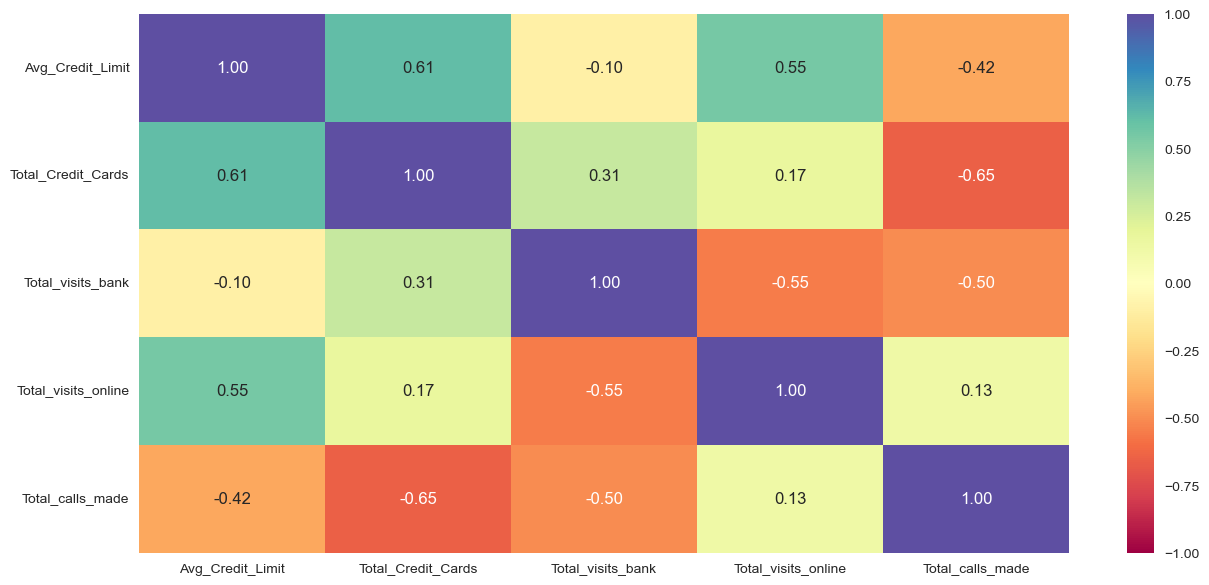

In [53]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- `Total_Credit_Cards` and `Avg_Credit_Limit` are Highly correlated with value 0.61. Customers with more credit cards tend to have a higher credit limit. This makes sense since banks typically provide higher limits to customers with multiple cards, assuming good creditworthiness.
  
- `Total_visits_online` and `Avg_Credit_Limit` are Highly correlaed (0.55). Customers with a higher credit limit tend to use online banking services more frequently. These customers might be more financially active and prefer digital banking over traditional visits or calls.
  
- `Total_Credit_Cards` and `Total_calls_made` are highly negatively correlated(-0.65). Customers with more credit cards tend to make fewer calls to the bank. This could mean they are more experienced in managing their finances, requiring less assistance. Alternatively, they may rely more on online banking and self-service options instead of calling support.
  
- `Total_visits_online` and `Total_visits_bank` are highly negatively correlated(-0.55). Customers who visit the bank more often tend to use online banking less, and vice versa.

- `Total_calls_made` and  `Total_visits_bank` are negatively correlated (-0.50)0. Customers who visit the bank more frequently tend to make fewer calls. Likely, these customers prefer face-to-face interactions and resolve issues in person rather than calling customer support.


### `Total_Credit_Cards` Vs `Avg_Credit_Limit`

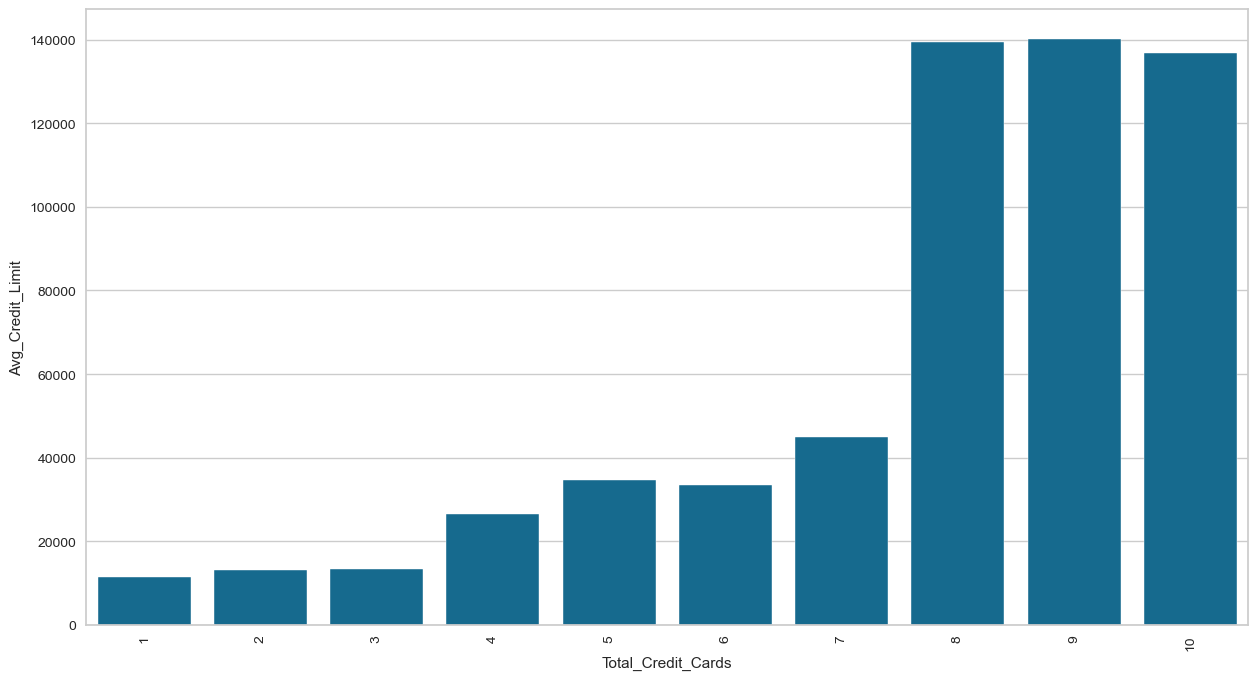

In [56]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Total_Credit_Cards', y='Avg_Credit_Limit', ci=False)  ## to choose the right variables
plt.xticks(rotation=90)
plt.show()

### `Total_visits_online` VS `Avg_Credit_Limit` 

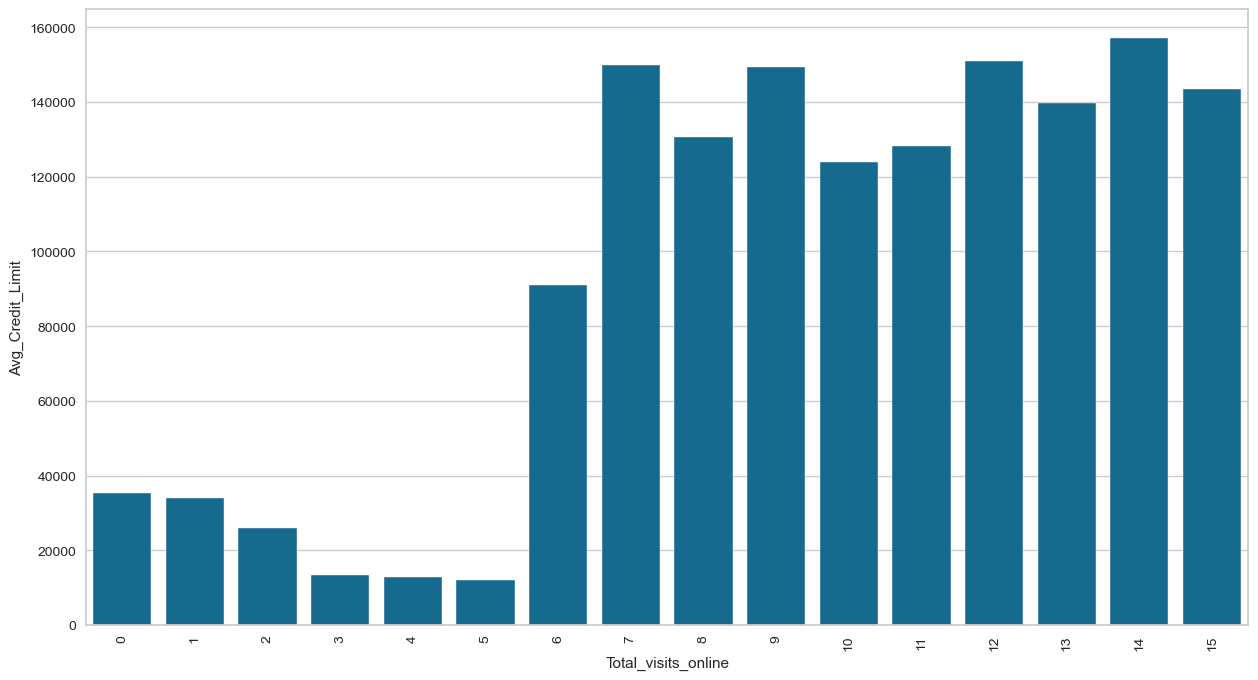

In [58]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Total_visits_online', y='Avg_Credit_Limit', ci=False)  ## to choose the right variables
plt.xticks(rotation=90)
plt.show()

### `Total_Credit_Cards` VS `Total_calls_made`

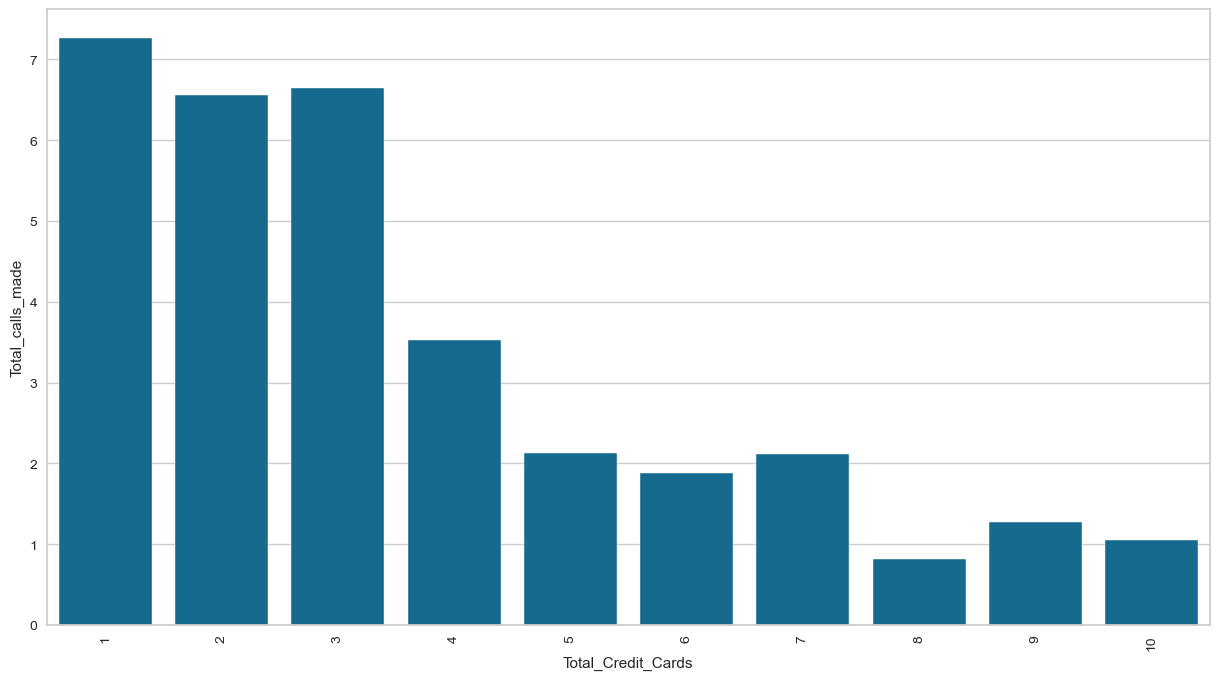

In [60]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Total_Credit_Cards', y='Total_calls_made', ci=False)  ## to choose the right variables
plt.xticks(rotation=90)
plt.show()

### `Total_visits_online` VS `Total_visits_bank`

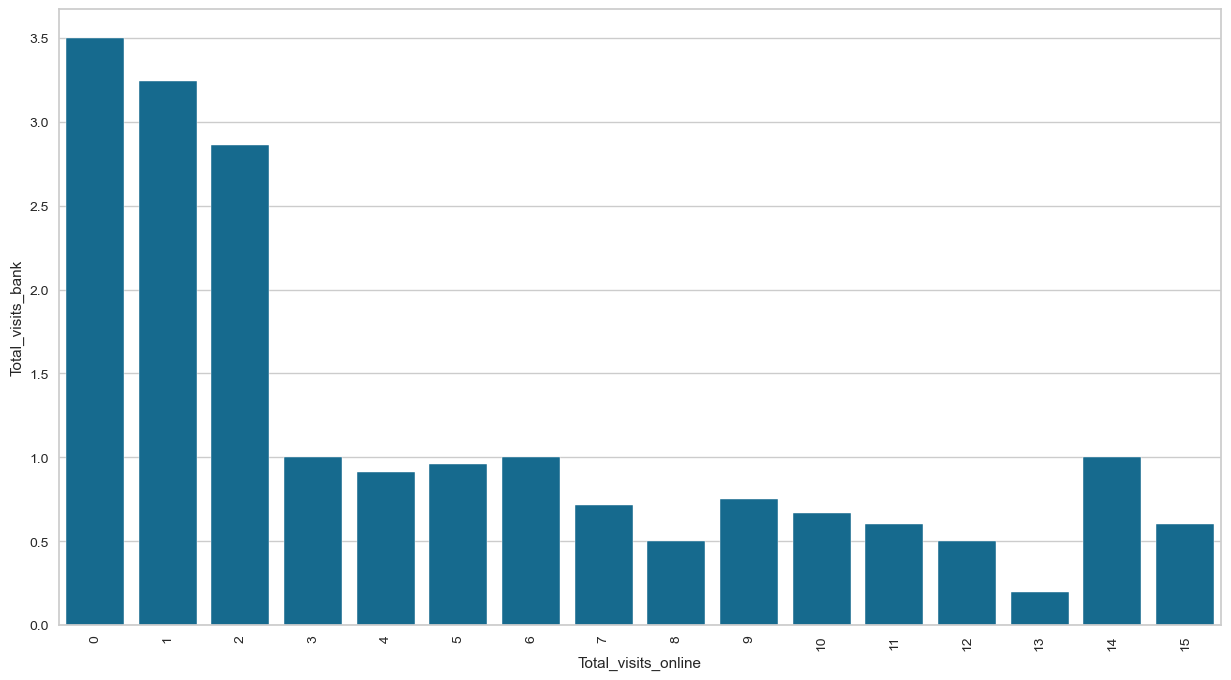

In [62]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Total_visits_online', y='Total_visits_bank', ci=False)  ## to choose the right variables
plt.xticks(rotation=90)
plt.show()

### `Total_calls_made` VS `Total_visits_bank`

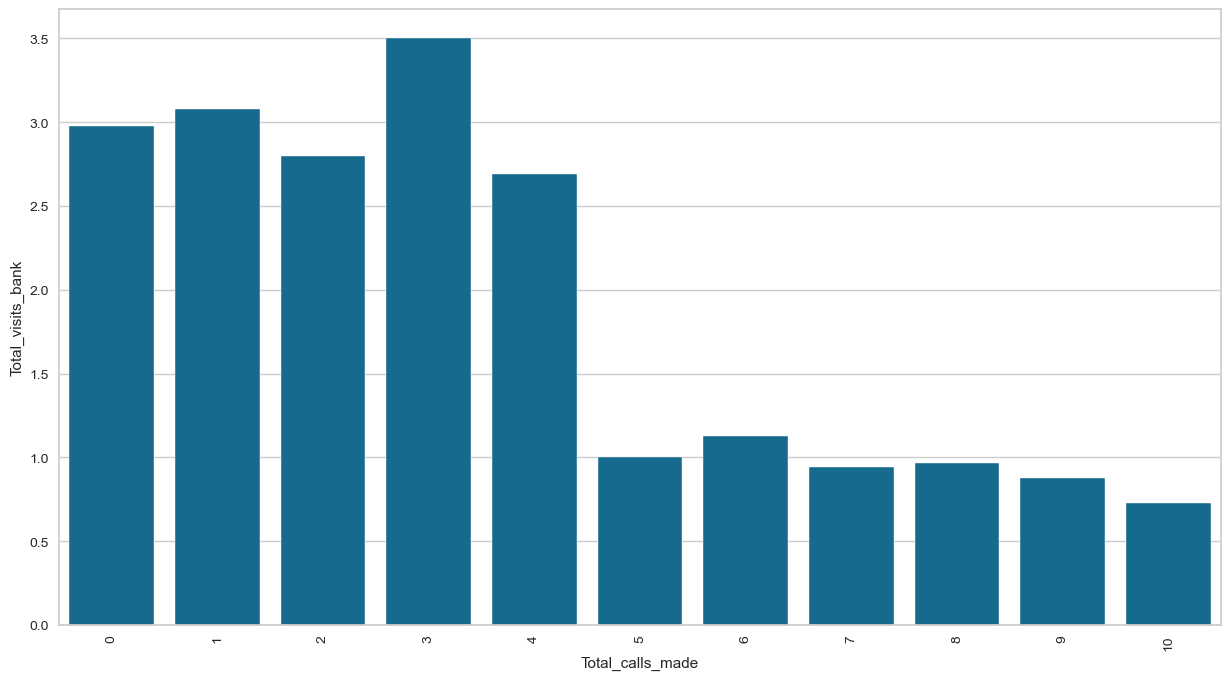

In [64]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Total_calls_made', y='Total_visits_bank', ci=False)  ## to choose the right variables
plt.xticks(rotation=90)
plt.show()

## Data preprocessing

### Outlier Check

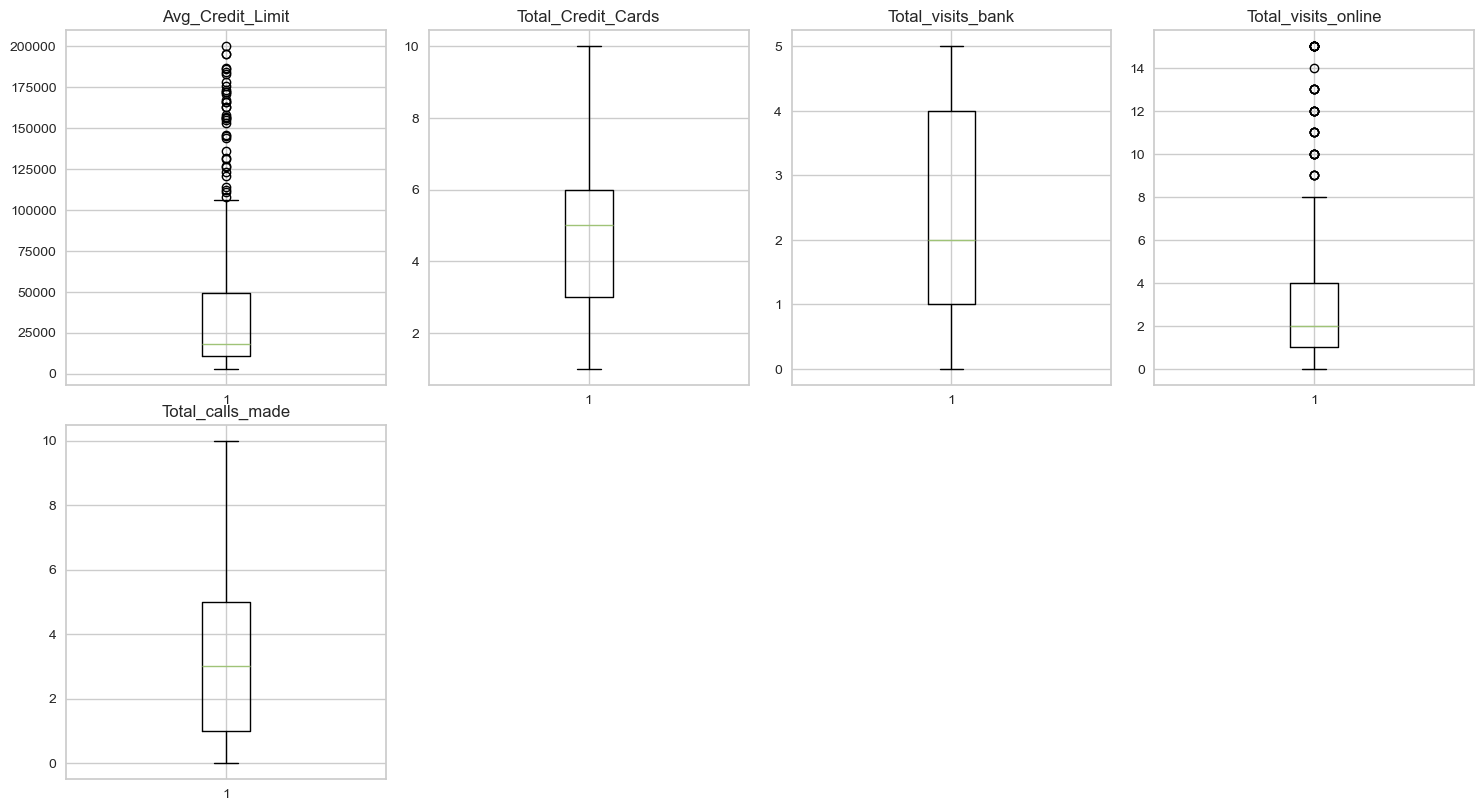

In [67]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* The `Avg_Credit_Limit` and `Total_visits_online` have a lot of outliers, meaning a small subset of high-value customers behaves very differently.
  
* Possible segmentation:
    - High-credit users: Likely digital banking users; can be targeted for premium offers.
    - Frequent online visitors: May be high-engagement users; good candidates for app-based promotions.
      
* No major outliers in other categories suggest most customers behave consistently.

In [155]:

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df_clean = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]
    return df_clean

# Remove outliers from selected numerical columns
df_cleaned = remove_outliers_iqr(df, ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"])


**Treated the outliers using IQR method**

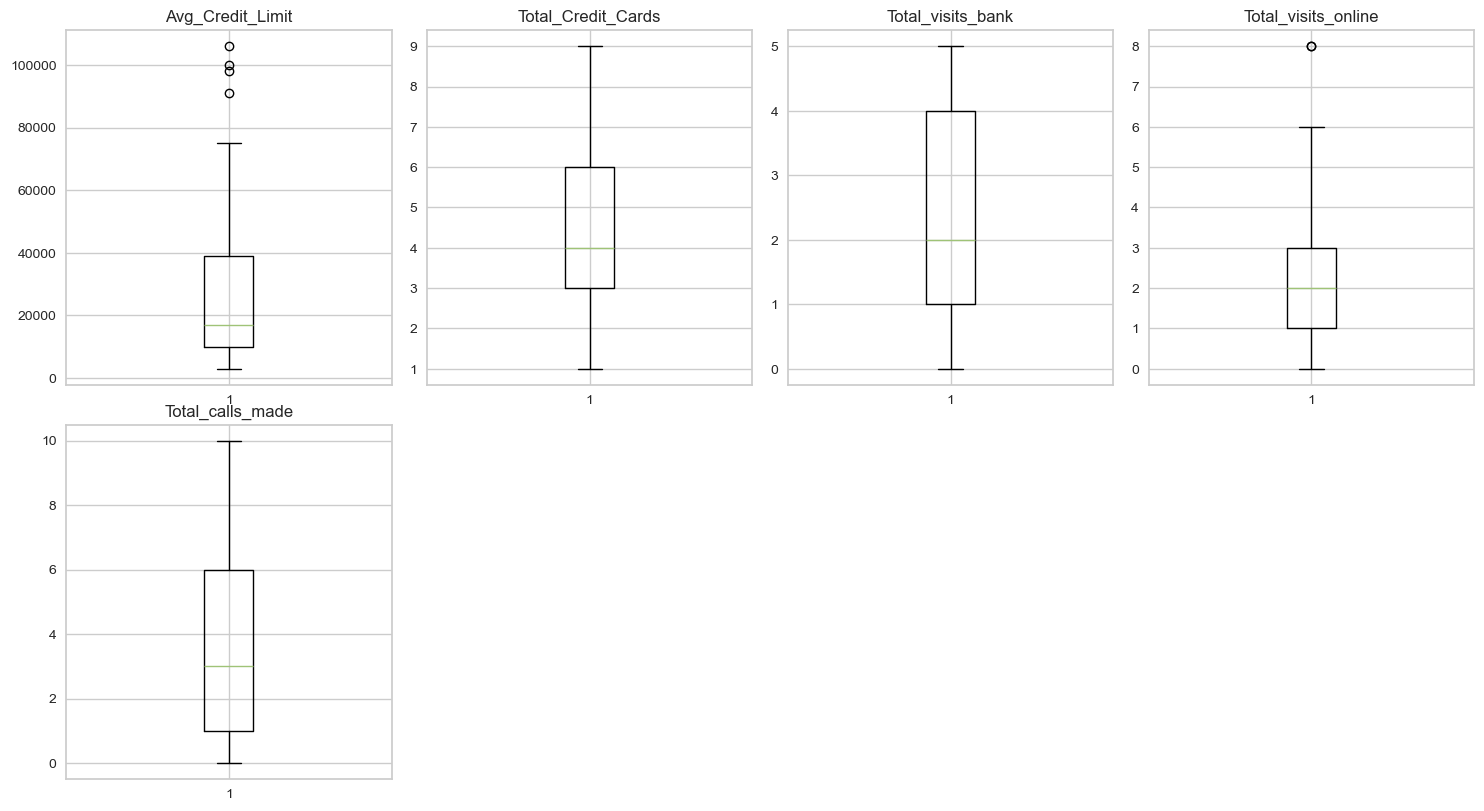

In [159]:
plt.figure(figsize=(15, 12))

numeric_columns = df_cleaned.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df_cleaned[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

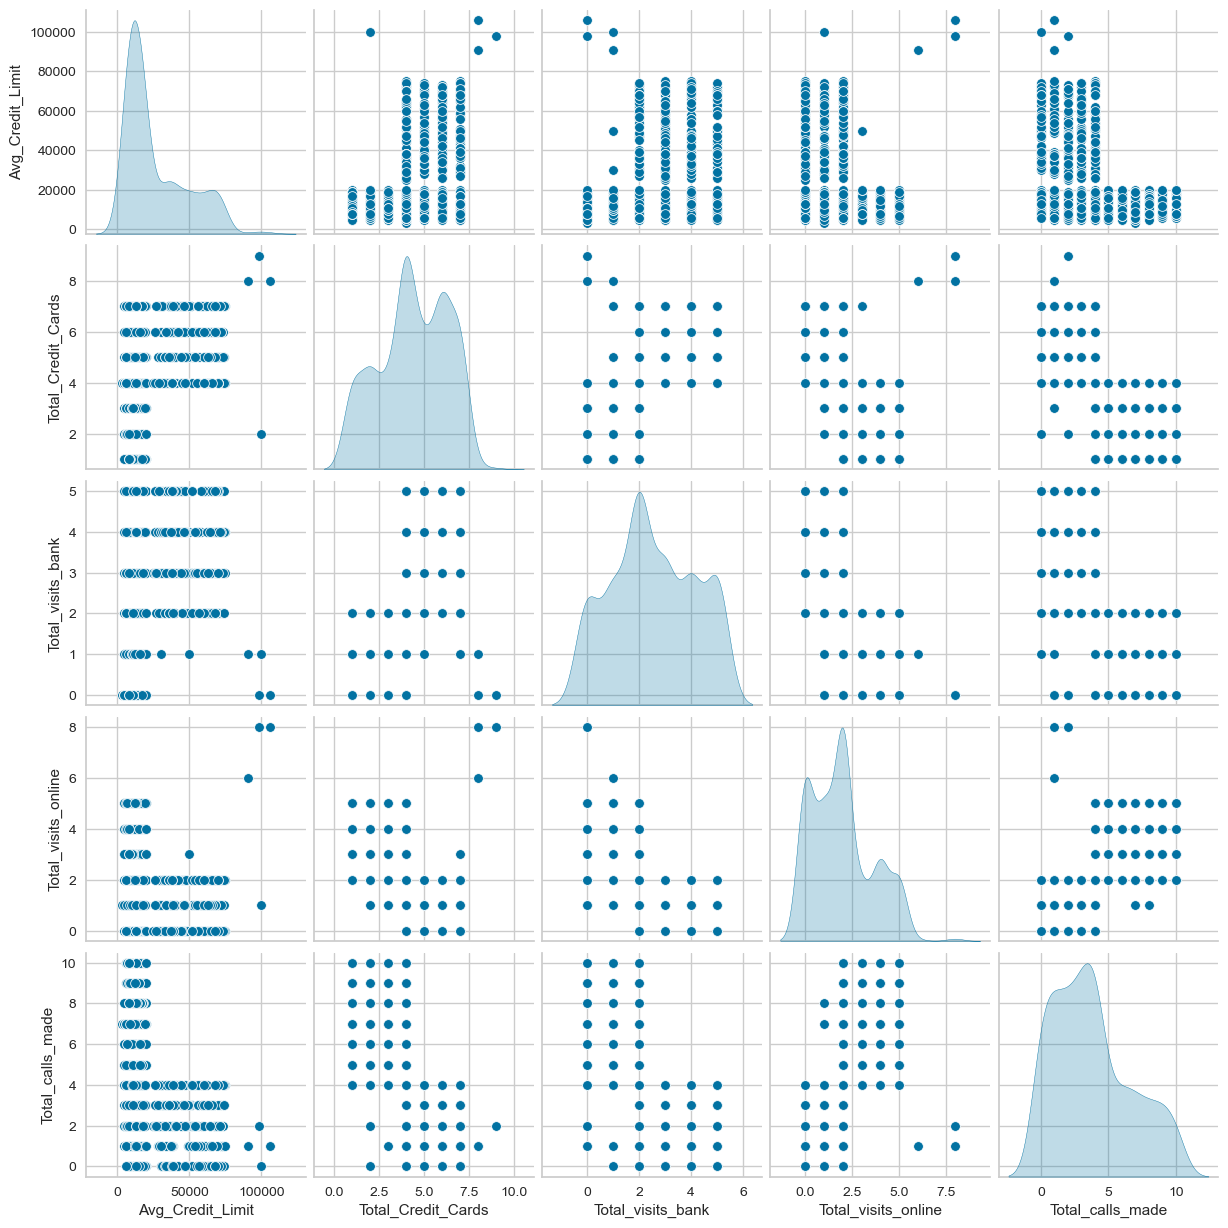

In [157]:
sns.pairplot(data=df_cleaned[num_col], diag_kind="kde")
plt.show()

**`Avg_Credit_Limit`:**
- Right-skewed distribution (many low values, few extremely high values).
- Strong correlation with `Total_Credit_Cards` (as the number of credit cards increases, the credit limit also increases).
- Some outliers visible.

**`Total_Credit_Cards`:**
- Shows a bimodal-like distribution (two peaks in the density).
- Positively correlated with `Avg_Credit_Limit`.
- Negatively correlated with `Total_calls_made` (as credit card count increases, fewer calls are made).

**`Total_visits_bank` vs. `Total_visits_online`:**
- Negative correlation: Customers who visit the bank more frequently tend to visit online platforms less.
- The distribution of bank visits is more spread out, while online visits are concentrated at lower values.
  
**`Total_calls_made`:**
- Shows negative correlation with both `Total_Credit_Cards` and `Total_visits_bank`.
- Some customers make significantly more calls than others.

### Scaling

In [162]:
num_col # variables used for clustering

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [164]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df_cleaned[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [166]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-Means Clustering

### Checking the elbow plot

In [168]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.1408682583341108
Number of Clusters: 2 	Average Distortion: 1.4383953103295255
Number of Clusters: 3 	Average Distortion: 1.3841879770659893
Number of Clusters: 4 	Average Distortion: 1.2086374412735184
Number of Clusters: 5 	Average Distortion: 1.1433851381930007


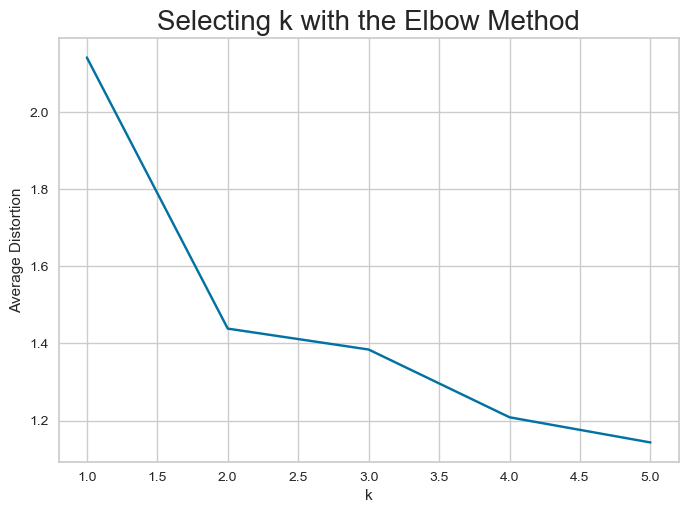

In [170]:
clusters = range(1,6)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

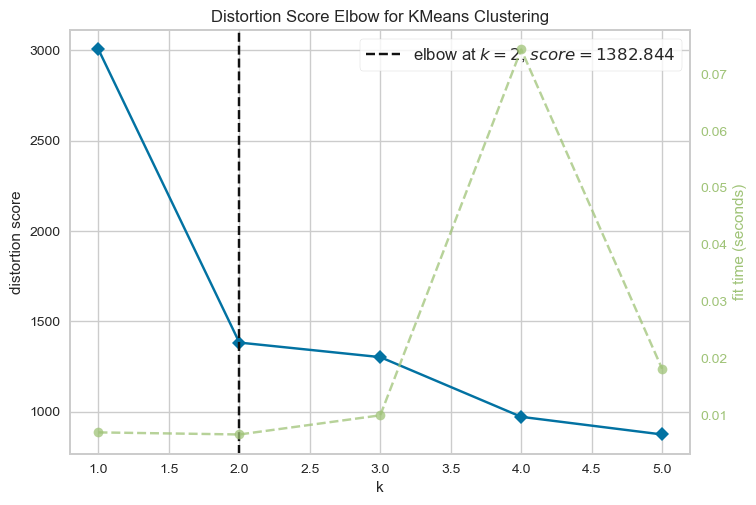

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [172]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 6), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Appropriate value for k seems to be 3.**

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.4770537959184115)
For n_clusters = 3, the silhouette score is 0.3095458163470457)
For n_clusters = 4, the silhouette score is 0.2562215004495415)
For n_clusters = 5, the silhouette score is 0.21206308444900046)


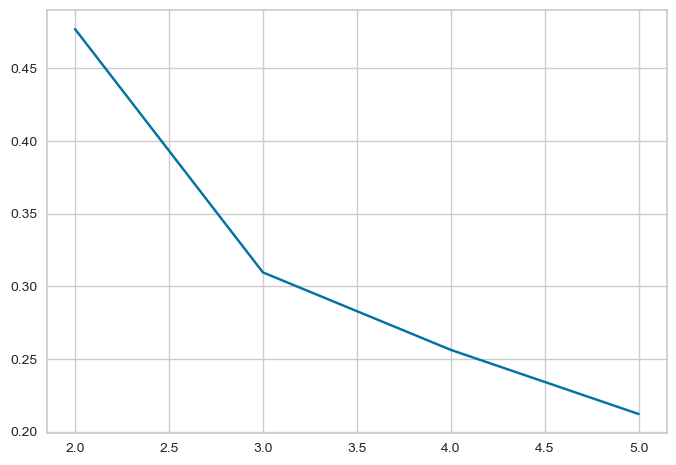

In [174]:
sil_score = []
cluster_list = range(2, 6)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((k_means_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

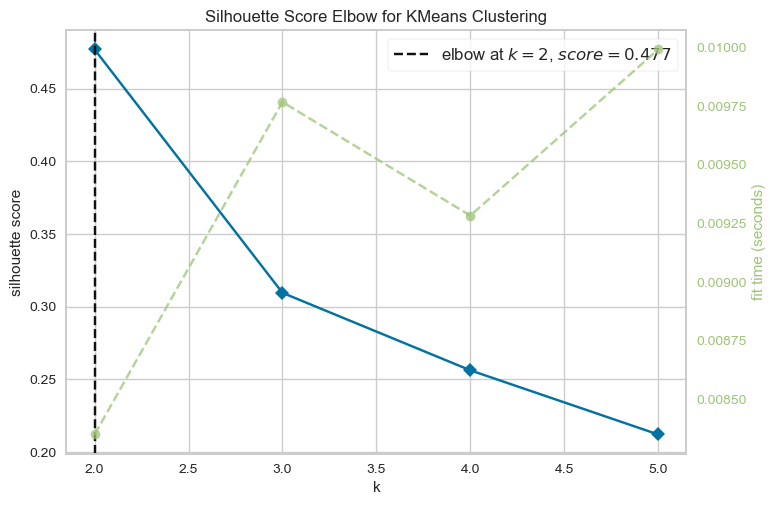

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [176]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 6), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**The Silhouette score selected for n-clusters = 3 (0.309) finalise to fix the K values as 3**

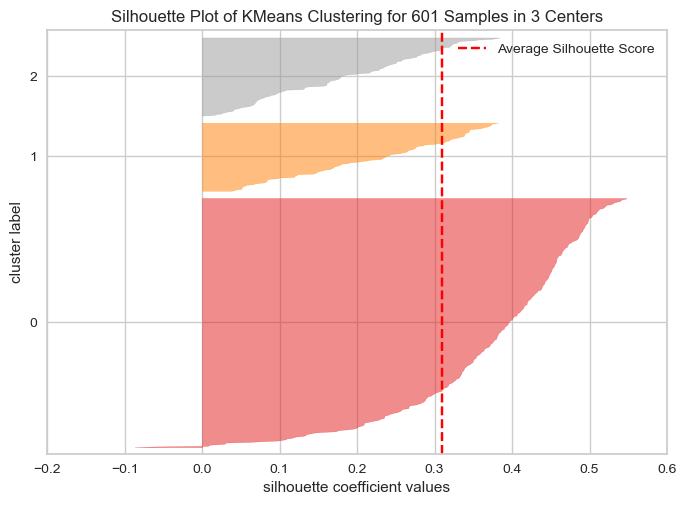

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 601 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [178]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

### Creating the Final Model

In [180]:
# final K-means model
kmeans = KMeans(n_clusters=3, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=3, random_state=1)

In [184]:
# creating a copy of the original data
df1 = df_cleaned.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster profiling

In [186]:
numeric_df1 = df1.select_dtypes(include='number')

km_cluster_profile = numeric_df1.groupby("KM_segments").mean()

In [188]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Total_Credit_Cards"].count().values  ## groupby the cluster labels
)

In [190]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
KM_segments,,,,,,
0,34796.296296,5.550265,3.468254,1.023810,1.976190,378
1,12134.615385,2.307692,0.923077,3.990385,8.500000,104
2,11882.352941,2.546218,1.008403,3.092437,5.378151,119


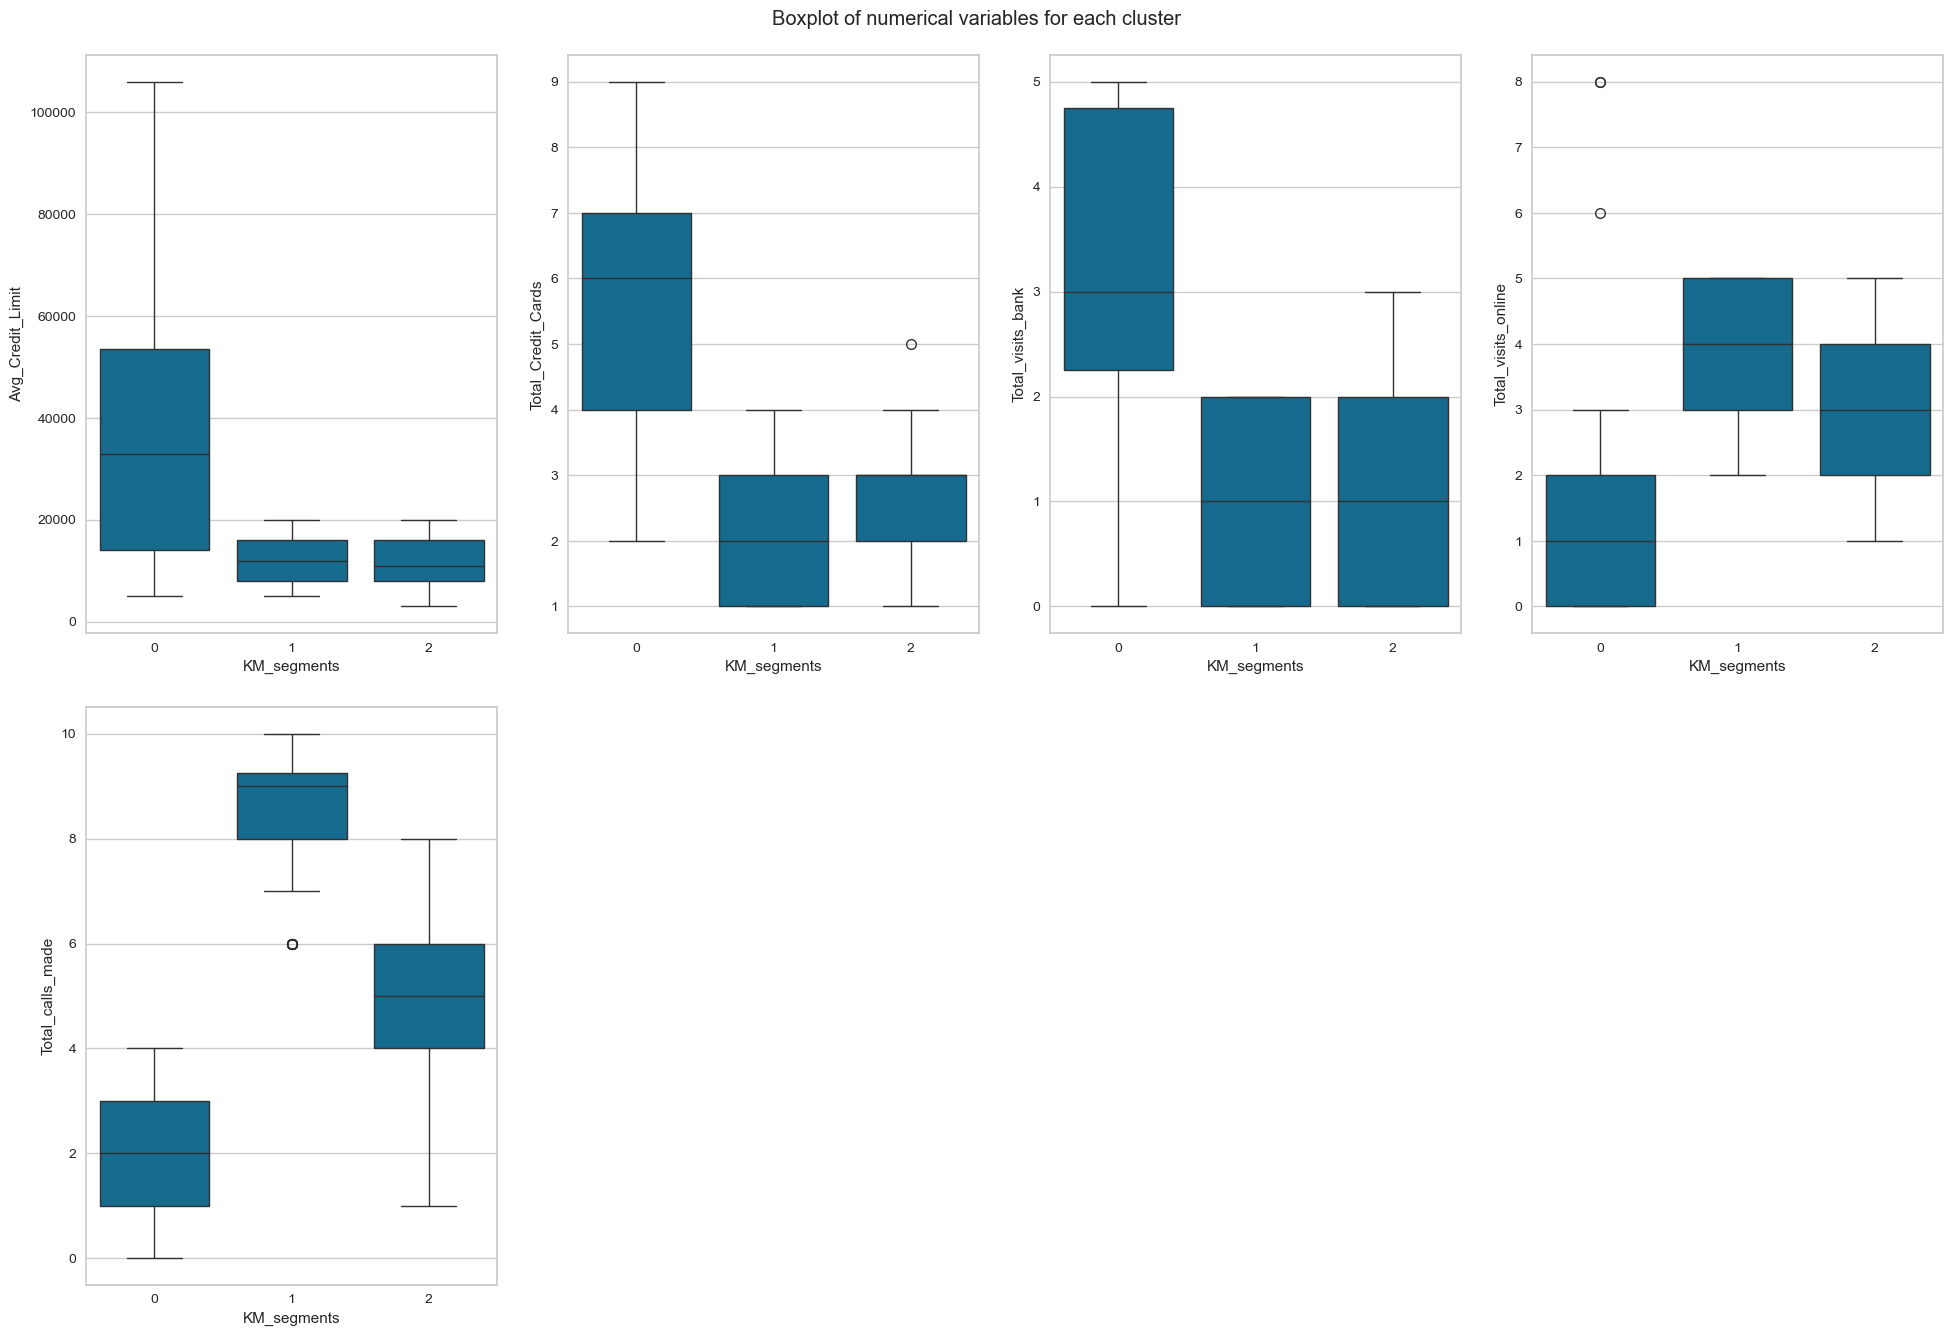

In [192]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='KM_segments'>

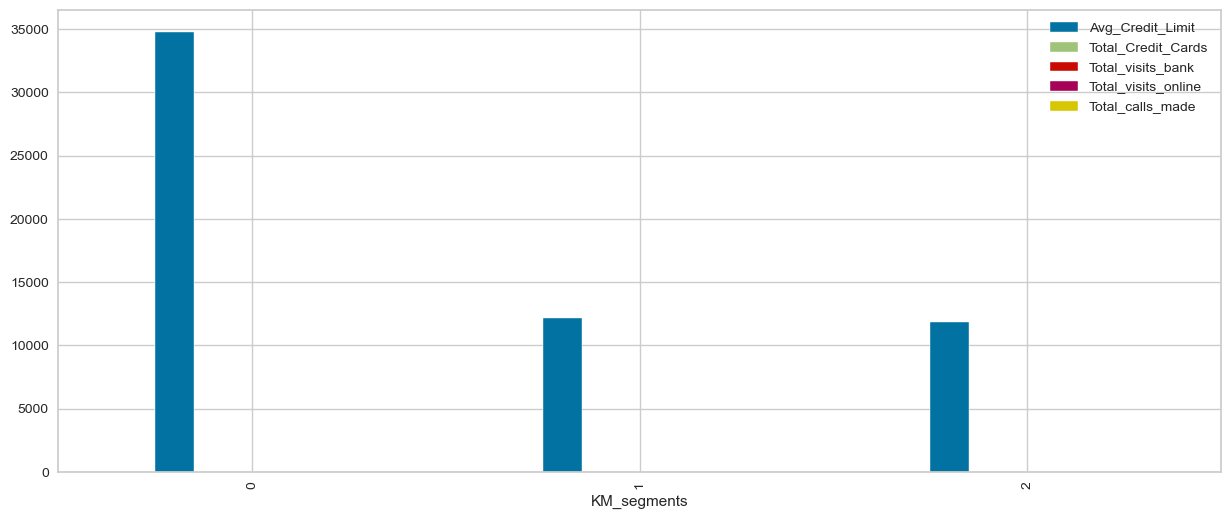

In [194]:
df1.groupby("KM_segments").mean().plot.bar(figsize = (15,6))

- Cluster profiling visualization shows the average values of different features (`Avg_Credit_Limit`, `Total_Credit_Cards`, `Total_visits_bank`, `Total_visits_online`, and `Total_calls_made`) across different **KM_segments (K-means clusters)**
- The scale of `Avg_Credit_Limit` is much higher than the other variables, making them almost invisible.
- This model is sensitive to Outliers and sensitive to initialize the cluster centres

## Hierarchical Clustering

### Computing Cophenatic correlation

In [200]:
hc_df = subset_scaled_df.copy()

In [202]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.3043225749635933.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8155054171914784.
Cophenetic correlation for Euclidean distance and average linkage is 0.8351177997762187.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.82998699560955.
Cophenetic correlation for Chebyshev distance and single linkage is 0.2876861331056504.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7300454653181311.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8241458734435407.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8092174823416615.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.2732684096233452.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.3481854596826671.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6233920543095369.
Cophenetic corr

In [204]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

****************************************************************************************************
Highest cophenetic correlation is 0.8351177997762187, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [207]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.3043225749635933.
Cophenetic correlation for complete linkage is 0.8155054171914784.
Cophenetic correlation for average linkage is 0.8351177997762187.
Cophenetic correlation for centroid linkage is 0.8261994060158777.
Cophenetic correlation for ward linkage is 0.7832495616128994.
Cophenetic correlation for weighted linkage is 0.82998699560955.
****************************************************************************************************
Highest cophenetic correlation is 0.8351177997762187, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

### Checking Dendrograms

**Let's see the dendrograms for the different linkage methods.**

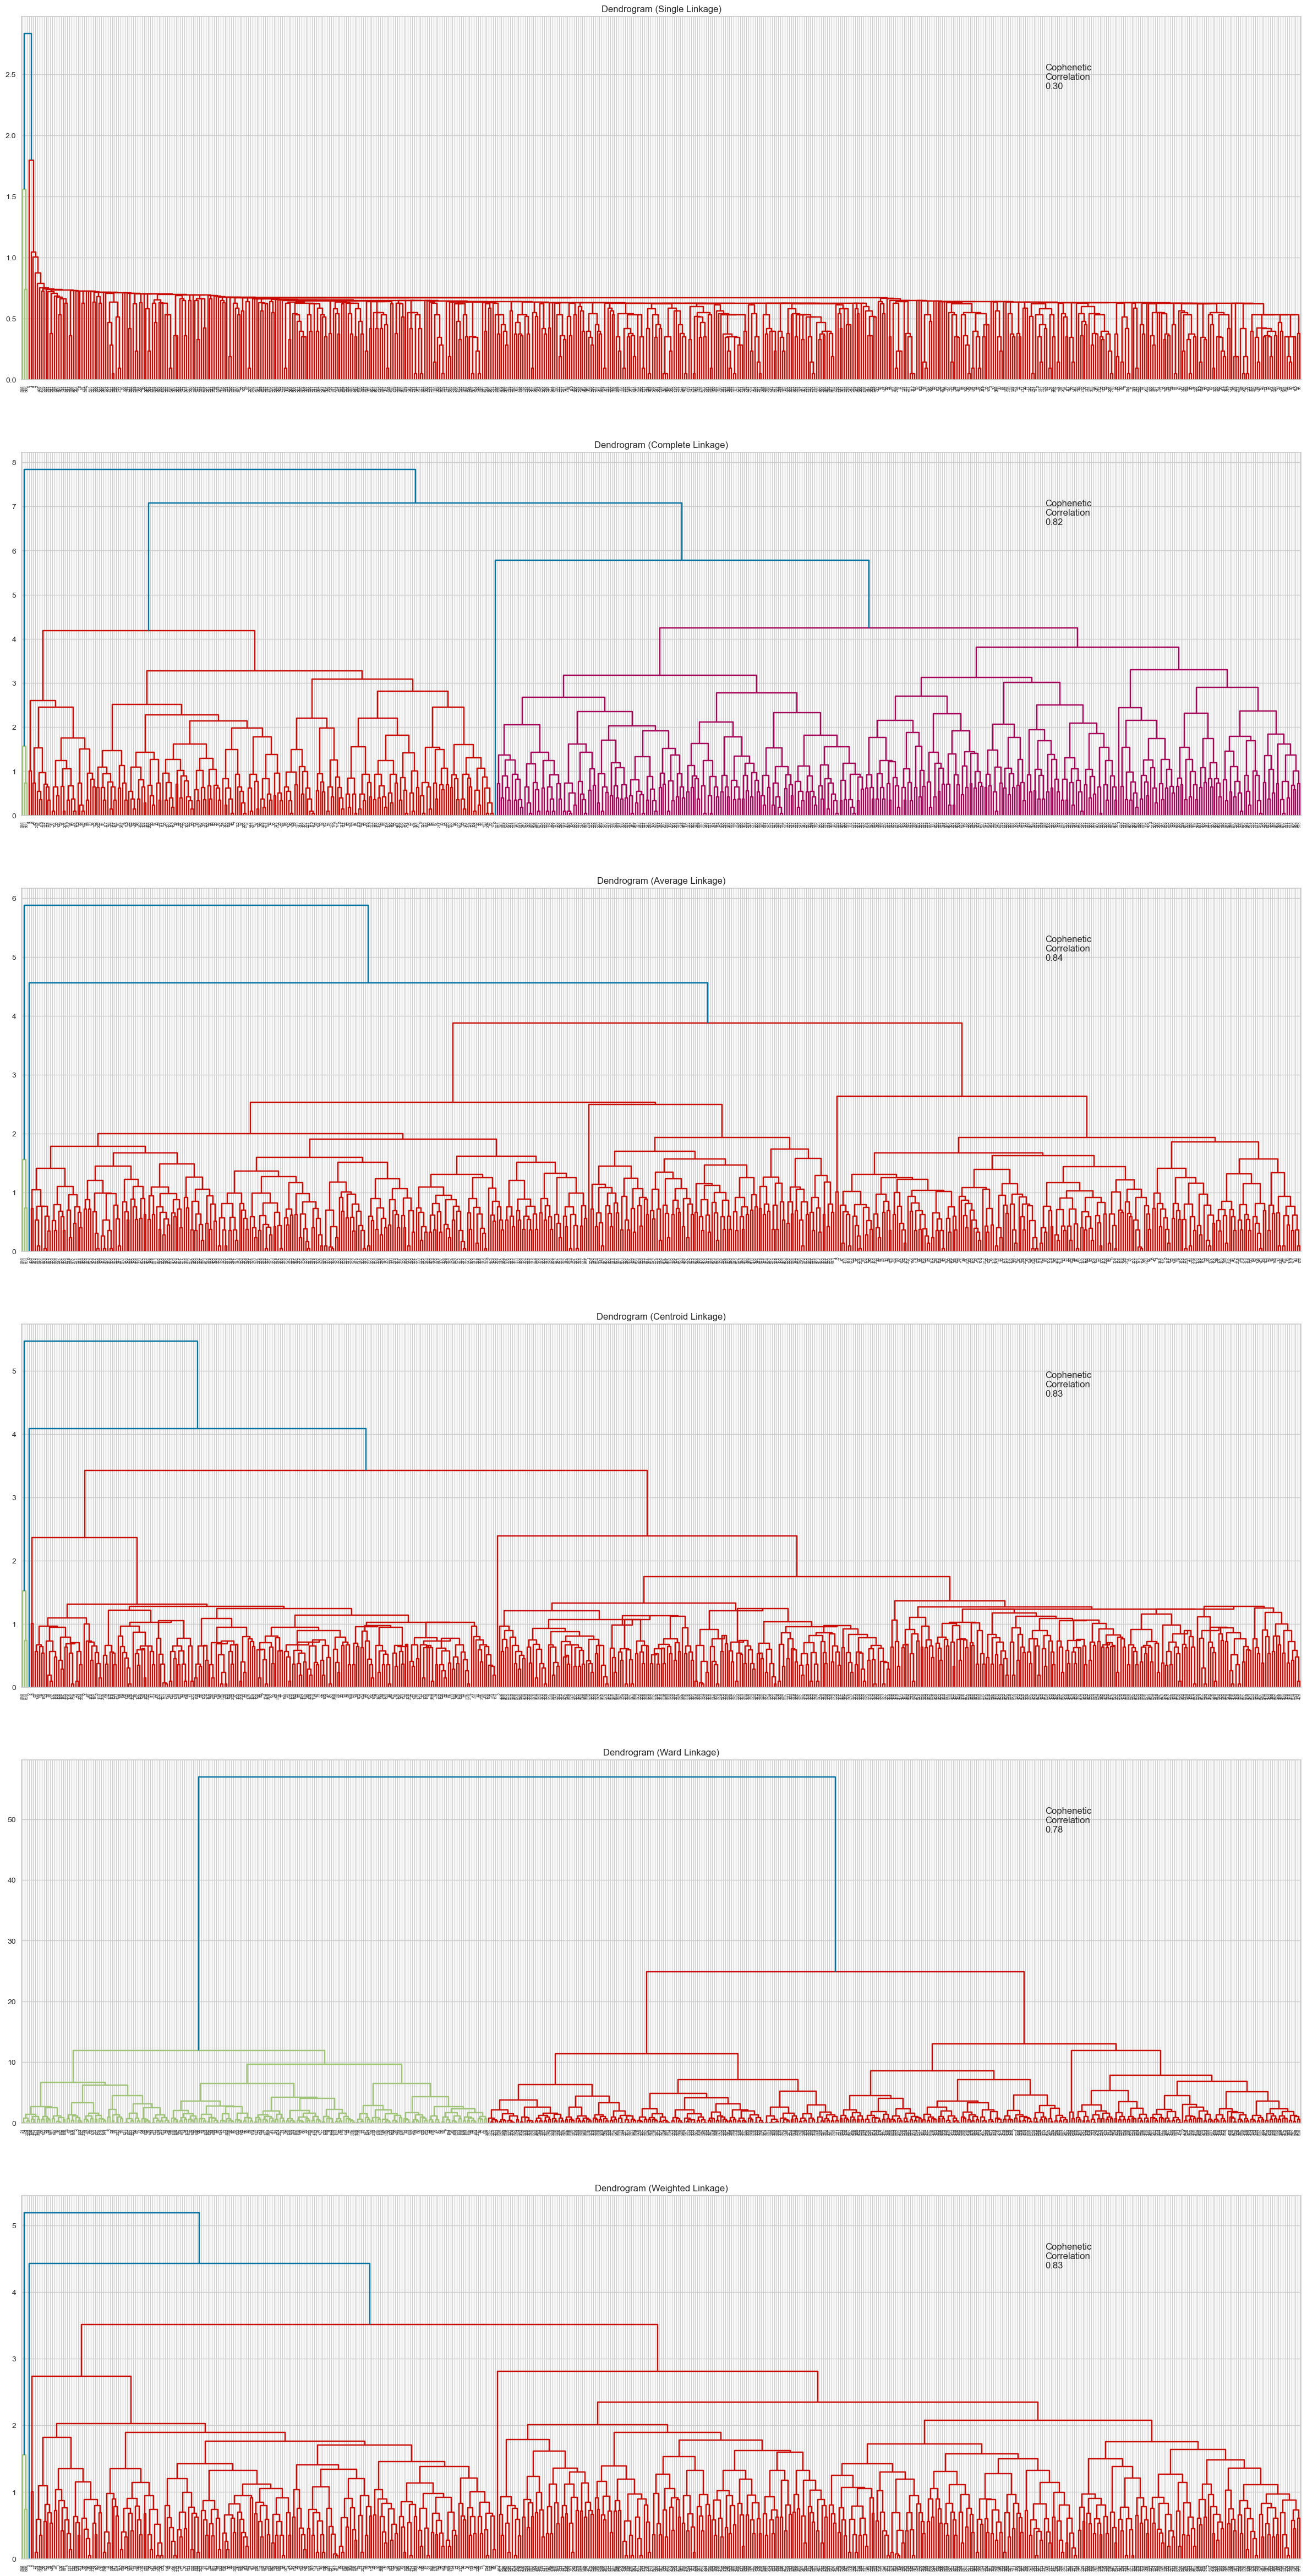

In [217]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(30, 60))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [220]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.304323
4,ward,0.783250
1,complete,0.815505
3,centroid,0.826199
5,weighted,0.829987
2,average,0.835118


**Observations**

- The Average Linkage (0.835) is the best choice because it has the highest cophenetic coefficient.
- Weighted (0.830), Centroid (0.826), and Complete (0.816) are also good choices.
- Single Linkage (0.304) is very poor and should not be used.
- Ward Linkage (0.783) is acceptable but not as good as Average.

**Conclusions**

- The cophenetic correlation is highest for average linkage method(0.84).
- We will move ahead with average linkage.
- 4 appears to be the appropriate number of clusters from the dendrogram for average linkage.



### Creating Model using sklearn

In [226]:
HCmodel = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage='average')  ## Code to define the hierarchical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [228]:
# creating a copy of the original data
df2 = df_cleaned.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster profiling

In [231]:
numeric_df2 = df2.select_dtypes(include=['number'])

hc_cluster_profile = numeric_df2.groupby("HC_segments").mean()  

In [235]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Total_Credit_Cards"].count().values  ## Groupby the cluster labels
)
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_segments,,,,,,
0,12091.324201,2.401826,0.945205,3.538813,6.894977,219
1,33825.396825,5.523810,3.486772,0.984127,2.002646,378
2,100000.000000,2.000000,1.000000,1.000000,0.000000,1
3,98333.333333,8.333333,0.333333,7.333333,1.333333,3


In [243]:
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following are the observations:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Total_Credit_Cards"].unique())
    print() # let's see the numbers in each cluster

In cluster 2, the following are the observations:
[2]

In cluster 1, the following are the observations:
[7 5 4 6]

In cluster 0, the following are the observations:
[3 2 4 1]

In cluster 3, the following are the observations:
[8 9]



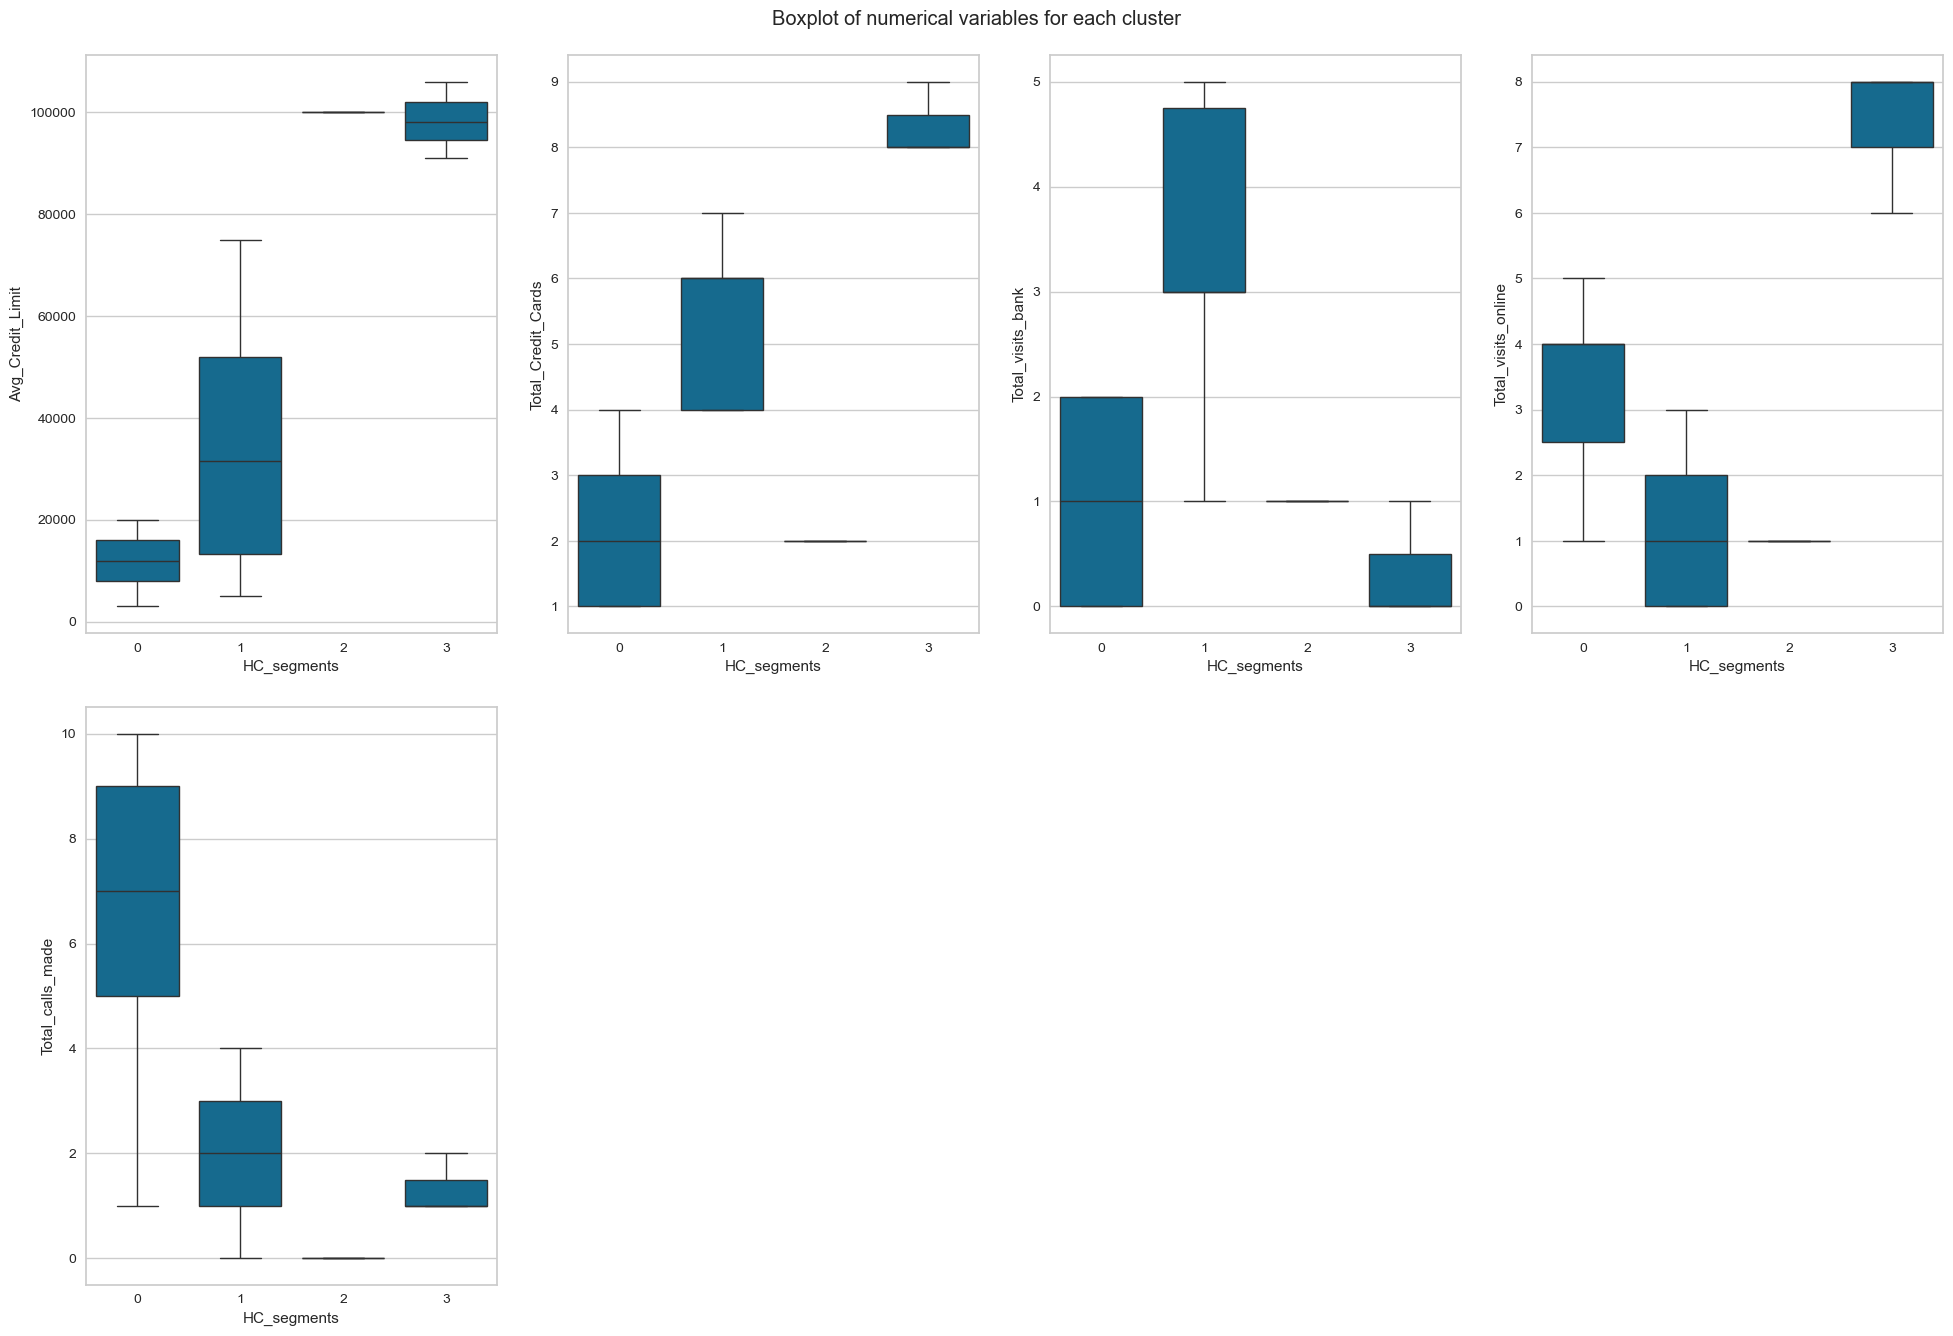

In [241]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

**Insights**
We will look into clusters 0 and 1 only

**Cluster 0** 

- There are 219 users in this cluster
- They have made highest number of calls to bank and low bank visits
- They have very low average credit limit ~ 12,000 rupees
- There online visit is moderate

**Cluster 1**

- They are active users with Moderate Credit Limit ~33,000 rupees
- They are the largest group with 378 users
- They have the highest bank visit, lowest online visit and few calls made to the bank
- The customers in this cluster have highest number of cards (4 to 6)


## Actionable insights and Recommendations

**Key Observations**

**Execution Time:**
- K-Means was significantly faster, making it better for large datasets.
- Hierarchical clustering took longer due to pairwise distance calculations.

**Number of Clusters:**

- K-Means identified 3 clusters, while Hierarchical clustering identified 4 clusters.
- The extra cluster in Hierarchical clustering could be an outlier effect (one very small cluster with 1-3 members).

**Cluster Similarity:**

- The first two clusters (0 & 1) were identical in both methods.
- K-Means merged high-credit-limit customers into a single cluster, whereas Hierarchical clustering further separated them.

**Appropriate Number of Clusters:**

- K-Means used the Elbow Method (k=3).
- Hierarchical clustering used Cophenetic Coefficient & Dendrogram (k=4).

**Observations**

- *If speed is a priority → Use K-Means*
- *If you need a detailed hierarchy of clusters → Use Hierarchical Clustering*
- *K-Means is better for large datasets, while Hierarchical clustering is better for small datasets or understanding relationships between clusters.*
